In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Extracting Data from the solar_power_dataset to Dataframe
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Data Mining\Solar_Power_Dataset.csv')

In [3]:
df

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,USAFA,20180928,1530,38.95,-104.83,1947,2.018090e+11,9,15,Fall,11.66992,43.22510,9.79611,14,10.0,802.3,722
21041,USAFA,20180929,1300,38.95,-104.83,1947,2.018090e+11,9,13,Fall,18.22510,28.98247,10.88992,13,10.0,799.2,722
21042,USAFA,20180929,1400,38.95,-104.83,1947,2.018090e+11,9,14,Fall,15.52124,33.49167,8.24479,10,10.0,798.4,722
21043,USAFA,20180929,1500,38.95,-104.83,1947,2.018090e+11,9,15,Fall,6.63452,51.62163,12.47328,10,10.0,797.8,722


In [4]:
# The datatypes of the individual columns
df.dtypes

Location          object
Date               int64
Time               int64
Latitude         float64
Longitude        float64
Altitude           int64
YRMODAHRMI       float64
Month              int64
Hour               int64
Season            object
Humidity         float64
AmbientTemp      float64
PolyPwr          float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
dtype: object

In [5]:
# No. of null values in the dataset
df.isna().sum()

Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
PolyPwr          0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
dtype: int64

In [6]:
# No. of duplicate values in the dataset
df.apply(lambda x:x.nunique())

Location            12
Date               500
Time                24
Latitude            12
Longitude           12
Altitude            11
YRMODAHRMI          18
Month               12
Hour                 6
Season               4
Humidity         10356
AmbientTemp       5259
PolyPwr          18804
Wind.Speed          40
Visibility          25
Pressure           934
Cloud.Ceiling       79
dtype: int64

In [8]:
df.columns

Index(['Location', 'Date', 'Time', 'Latitude', 'Longitude', 'Altitude',
       'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
       'PolyPwr', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling'],
      dtype='object')

In [9]:
df_IDV = df[['PolyPwr','Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp','Altitude',
        'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling']]

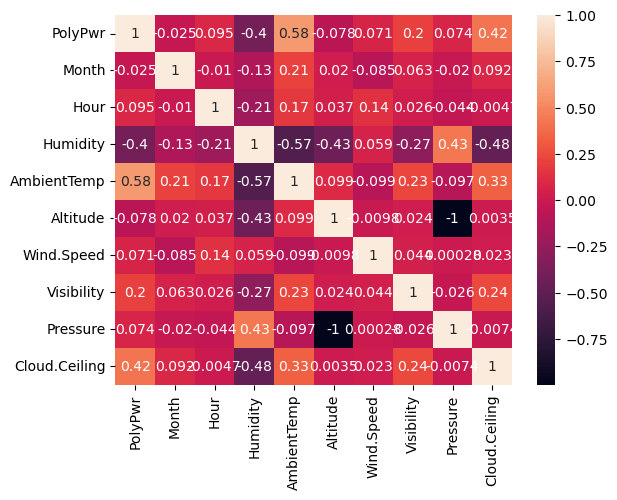

In [10]:
plt.plot(figsize=(5,5))
sns.heatmap(df_IDV.select_dtypes(include = np.number).corr(), annot = True)
plt.show()

In [11]:
df_numeric_values = df[['PolyPwr','Humidity', 'AmbientTemp',
       'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling']]

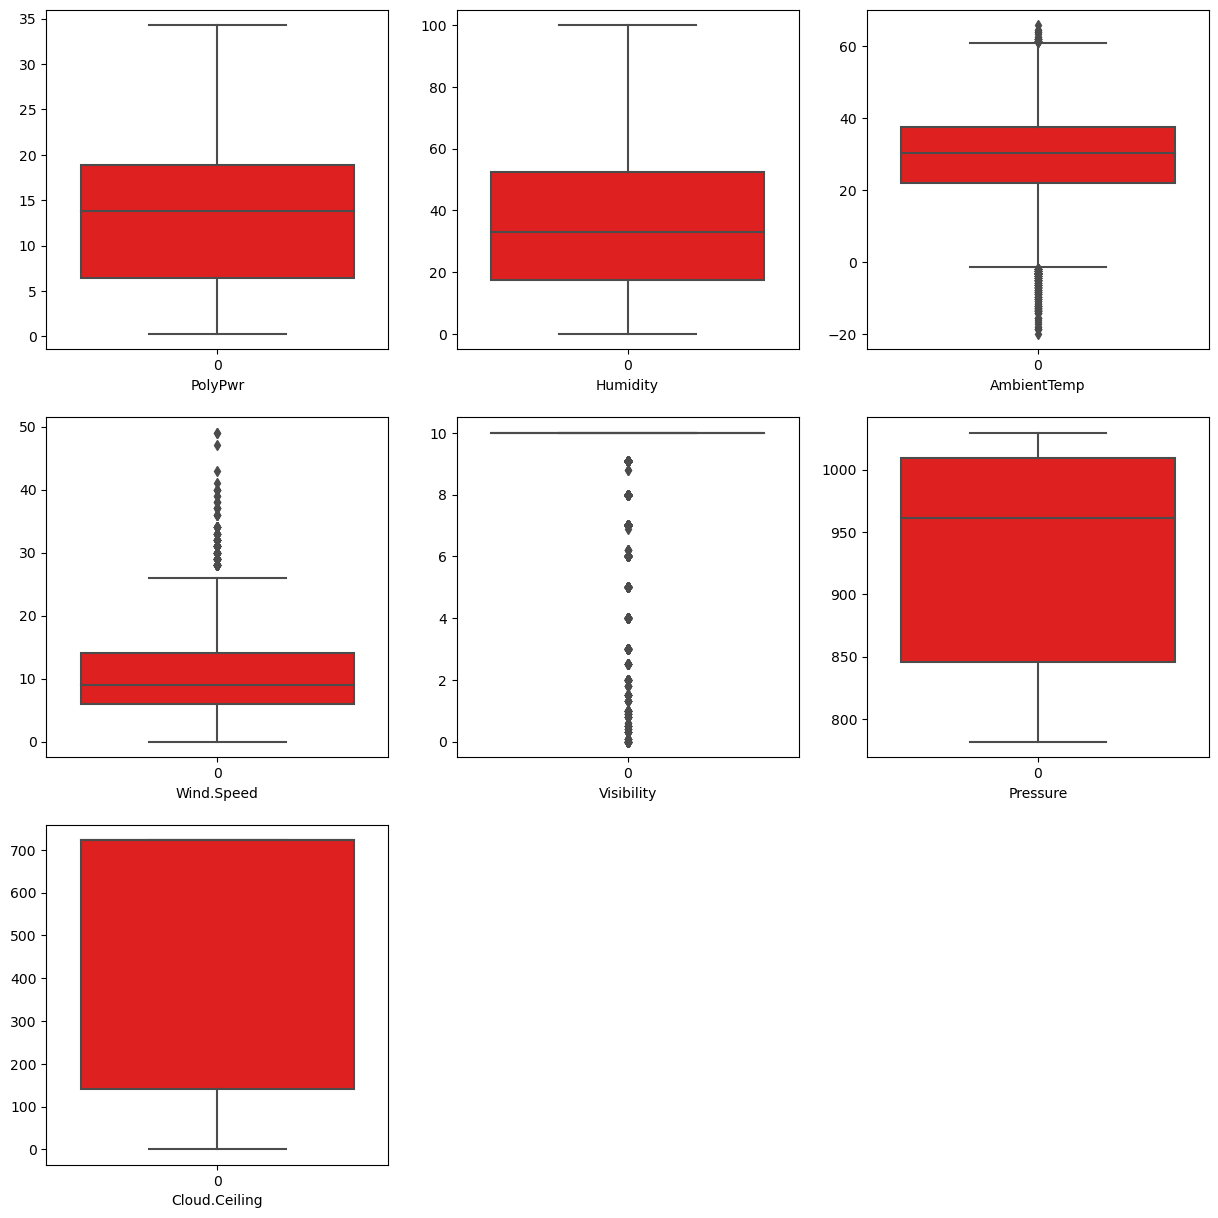

In [45]:
# Boxplots for the indecepndent variables of the given dataset
index = 1
plt.figure(figsize = (15,15))
for i in df_numeric_values.columns:
    plt.subplot(3,3,index)
    sns.boxplot(df[i], color = 'red')
    plt.xlabel(i)
    index += 1

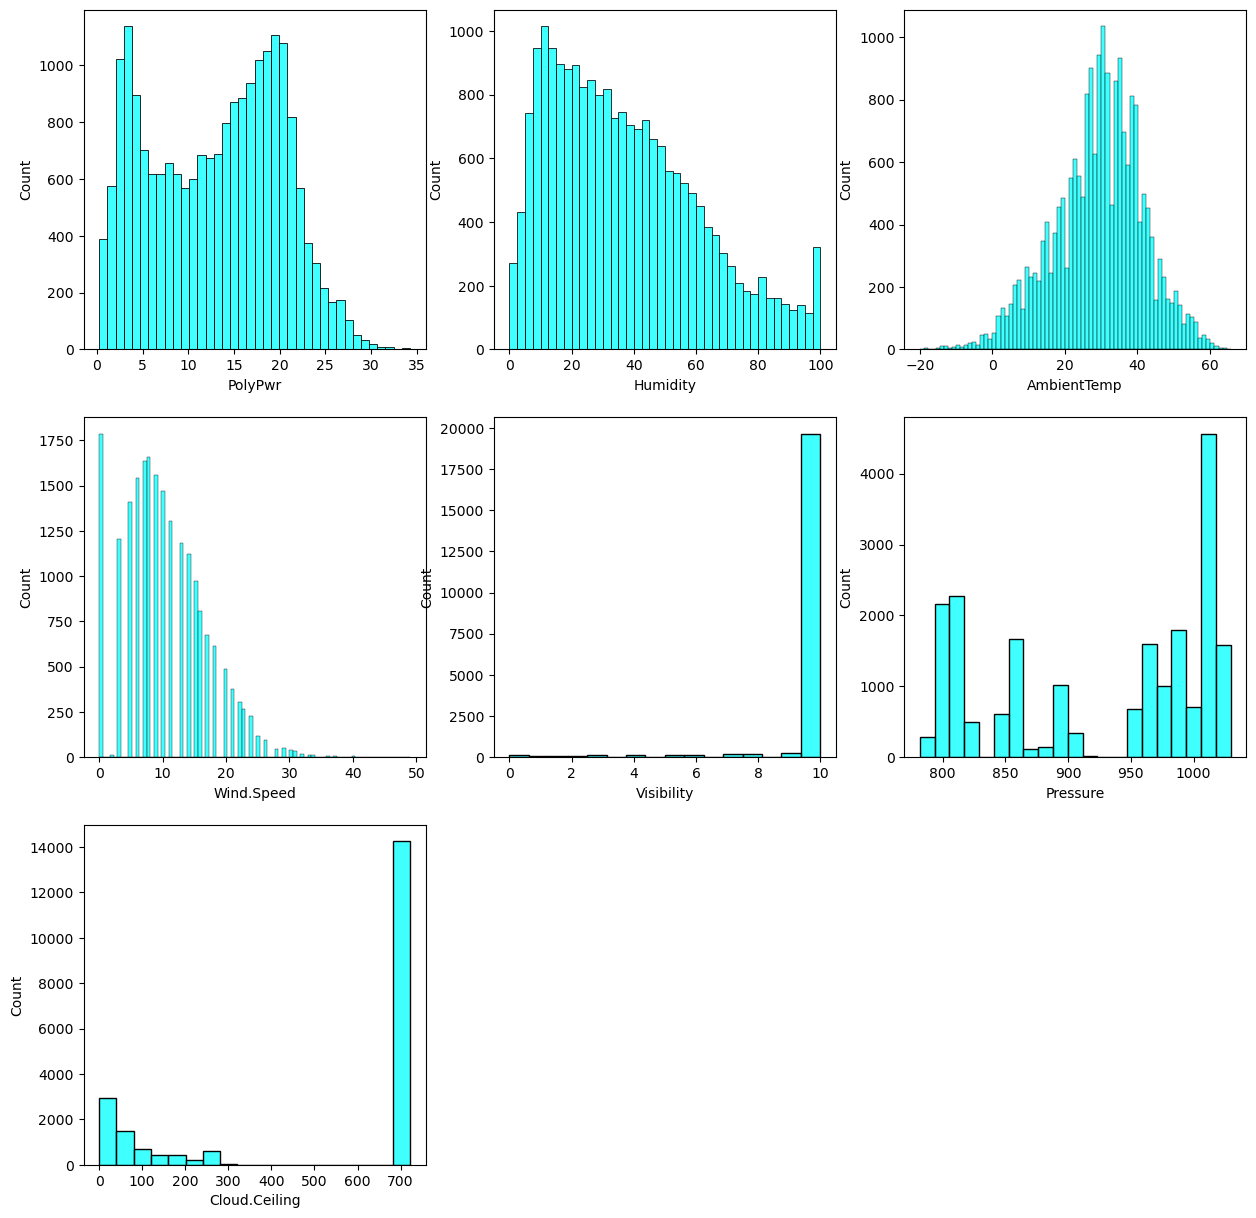

In [13]:
# histplots for the indecepndent variables of the given dataset
index = 1
plt.figure(figsize = (15,15))
for i in df_numeric_values.columns:
    plt.subplot(3,3,index)
    sns.histplot(df[i], color = 'cyan')
    plt.xlabel(i)
    index += 1

In [14]:
df['Cloud.Ceiling'].value_counts()

722    14256
250      588
200      226
60       215
50       192
       ...  
48        39
300       35
1         10
0          4
56         1
Name: Cloud.Ceiling, Length: 79, dtype: int64

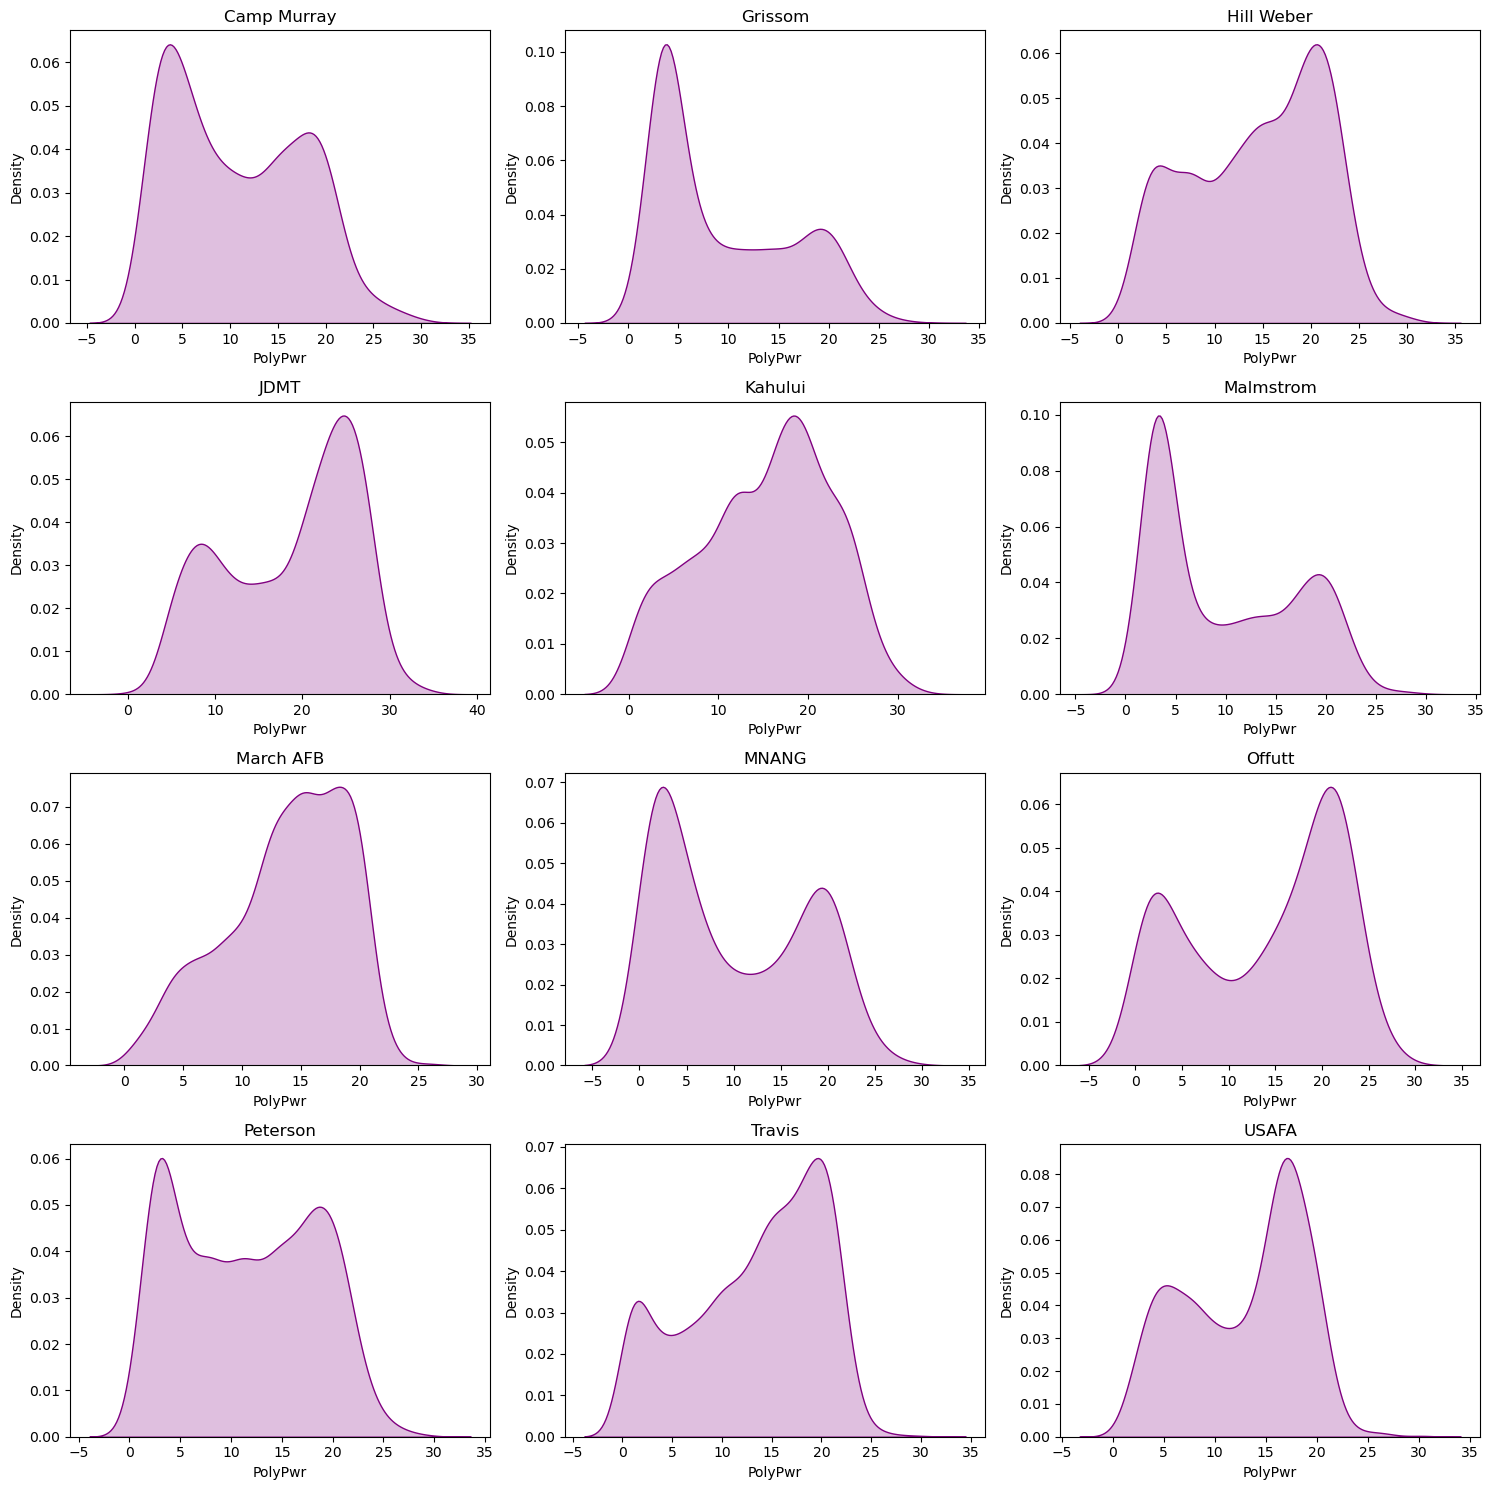

In [22]:
# sns.kdeplot(data = df, x = 'PolyPwr', hue = 'Location')
index = 1
plt.figure(figsize=(15,15))
for i in df['Location'].unique():
    plt.subplot(4,3,index)
    sns.kdeplot(df[df['Location'] == i]['PolyPwr'],color = 'purple', fill = True)
    plt.title(i)
    index += 1
plt.tight_layout()
plt.show()

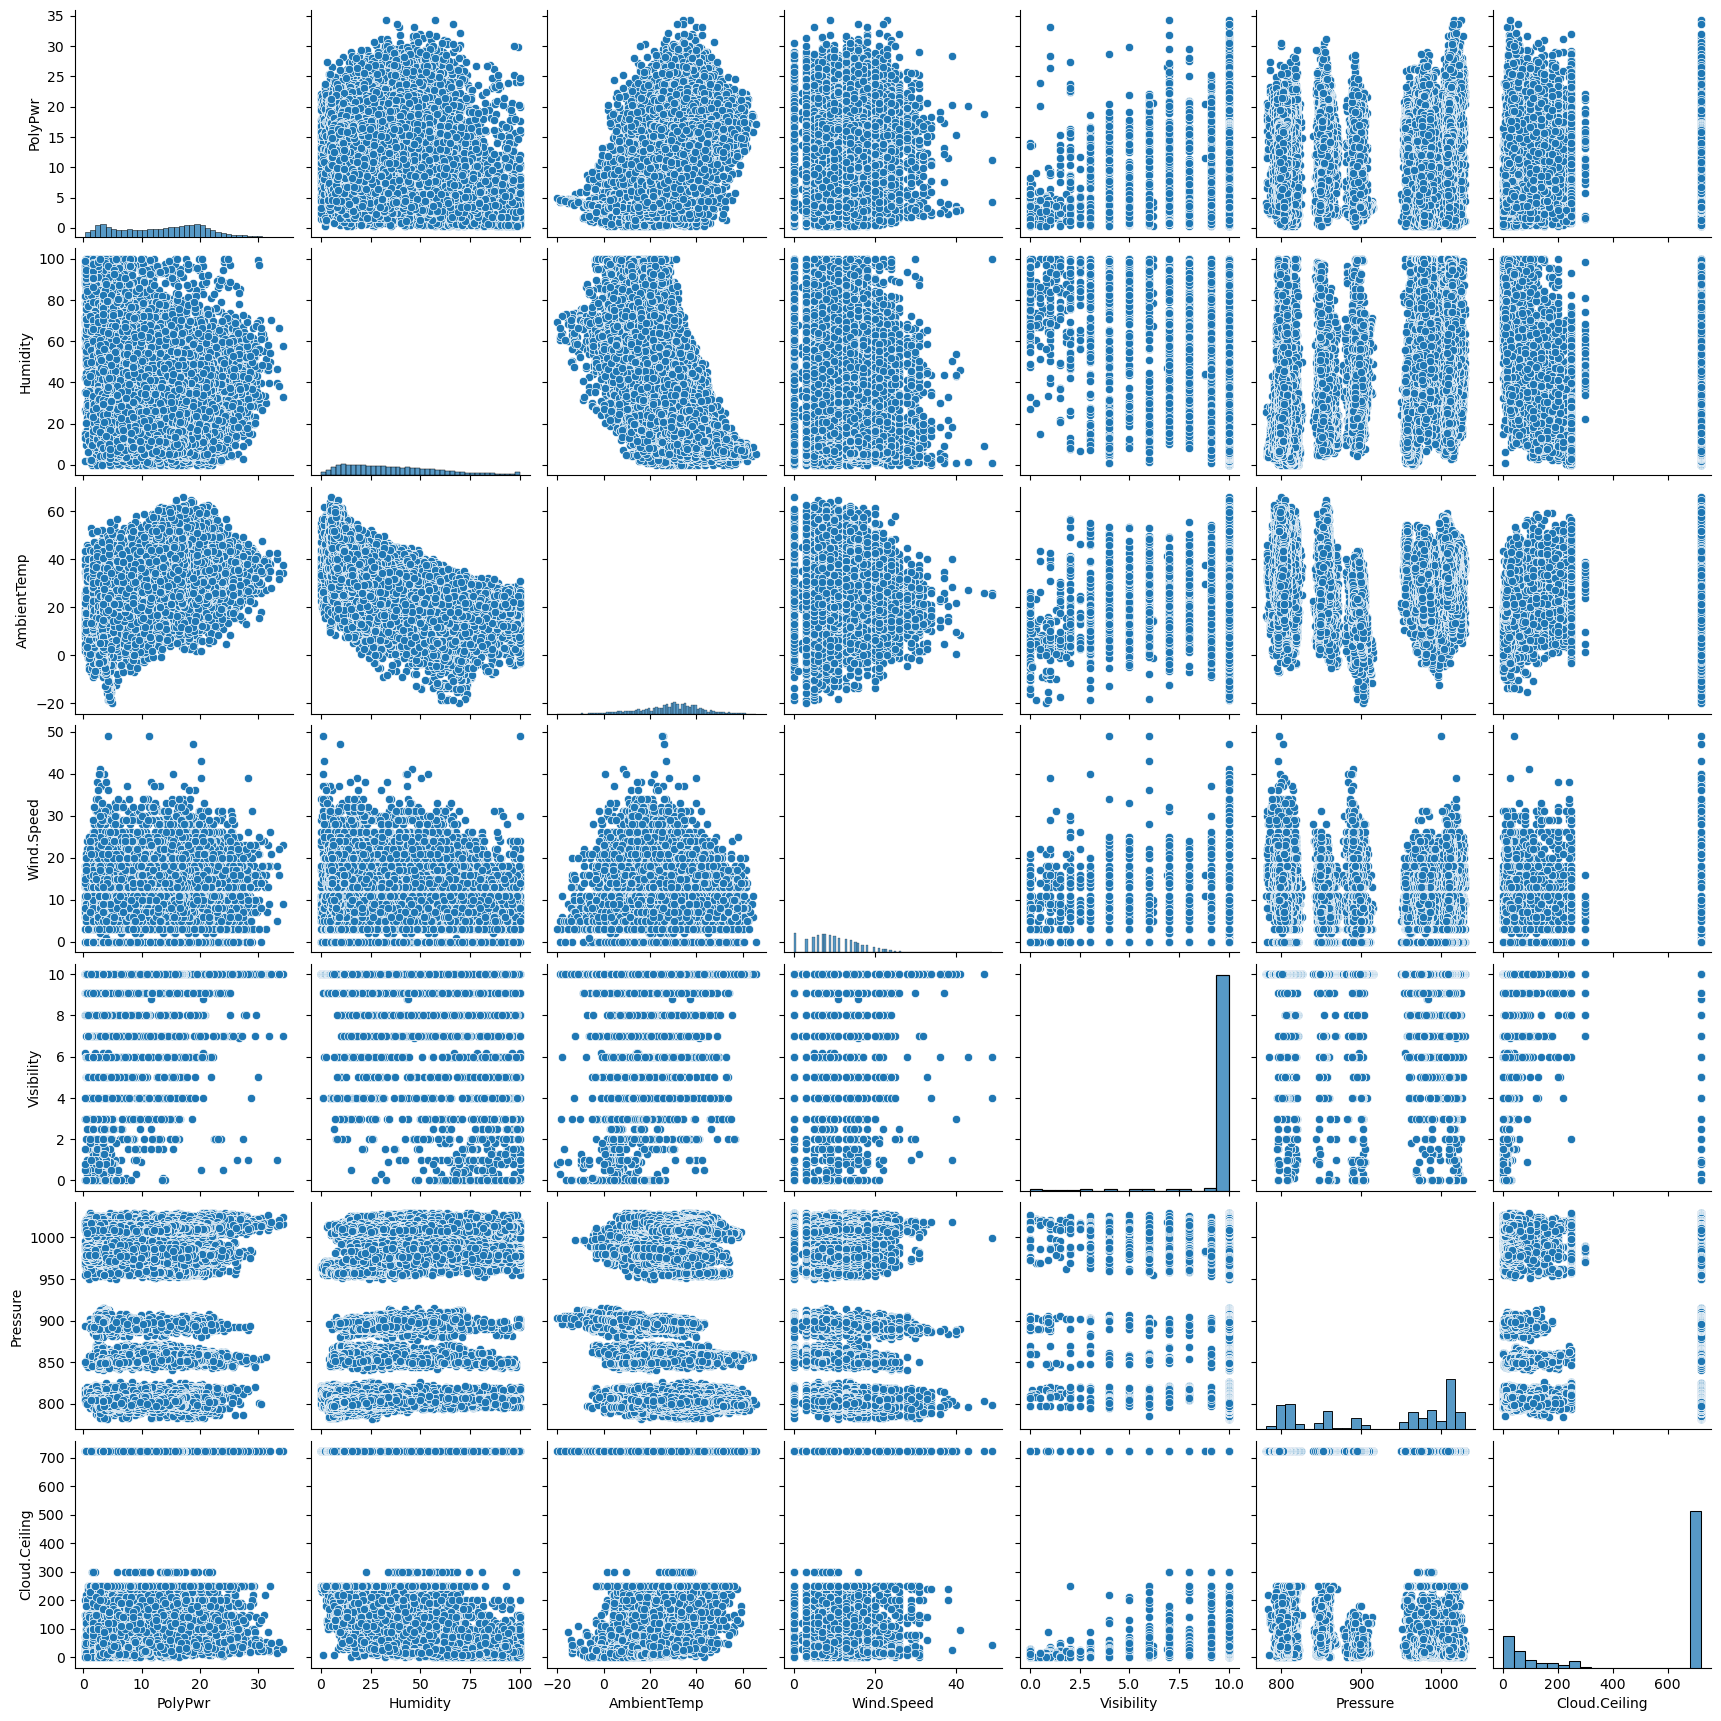

In [24]:
sns.pairplot(df_numeric_values)
plt.show()

In [31]:
df_avg = df.groupby(by = ['Location','Season']).mean()

In [33]:
df_avg.reset_index(inplace = True)

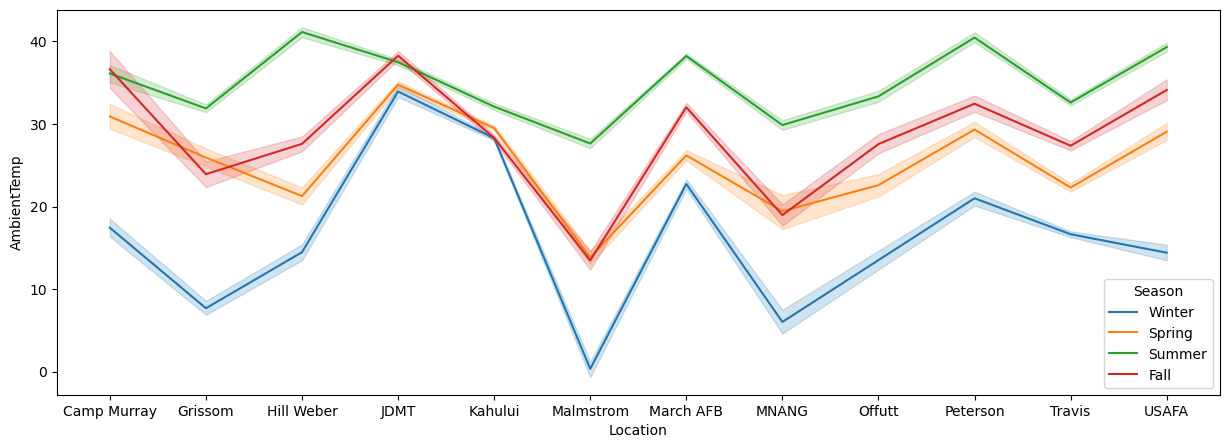

In [41]:
# Average Ambient Temperature across different season and different places
plt.figure(figsize=(15,5))
sns.lineplot(data = df, y = 'AmbientTemp', x = 'Location', hue = 'Season')
plt.show()

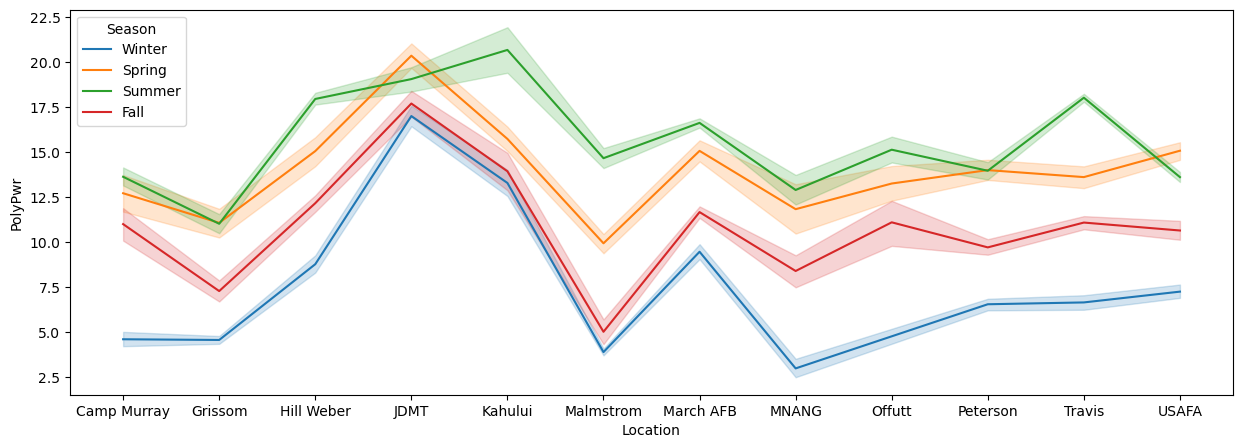

In [43]:
# Average Ambient Humidity across different season and different places
plt.figure(figsize=(15,5))
sns.lineplot(data = df, y = 'PolyPwr', x = 'Location', hue = 'Season')
plt.show()

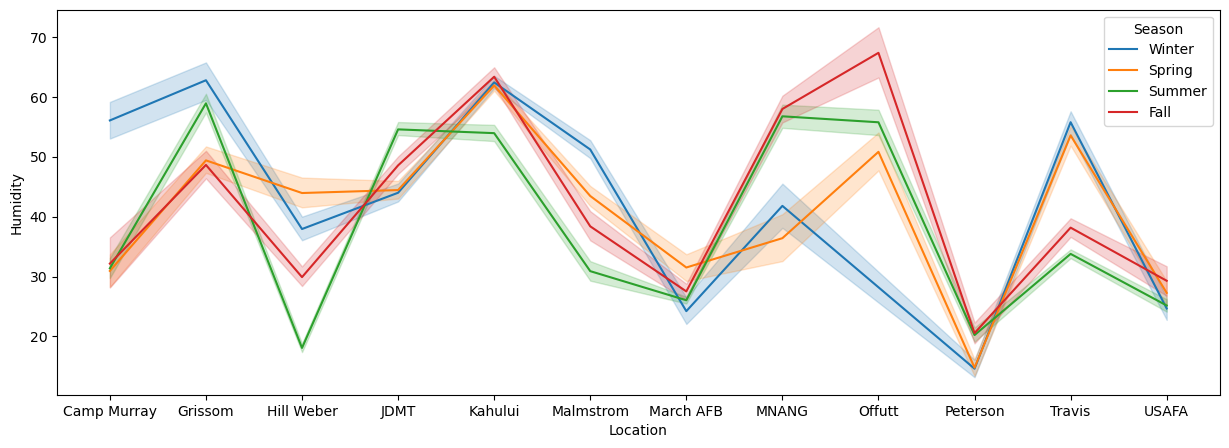

In [42]:
# Average Humidity across different season and different places
plt.figure(figsize=(15,5))
sns.lineplot(data = df, y = 'Humidity', x = 'Location', hue = 'Season')
plt.show()

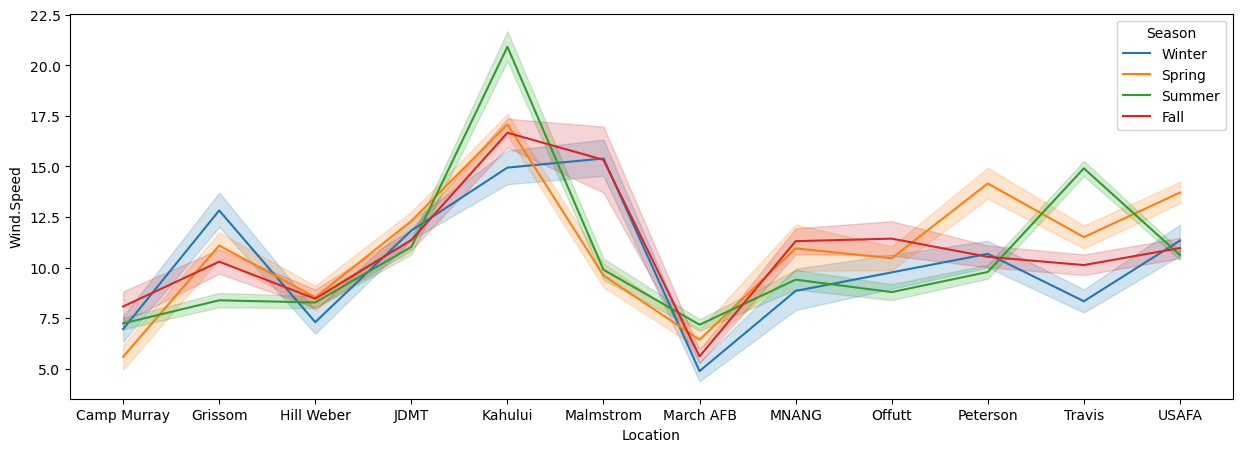

In [47]:
# Average Wind Speed across different season and different places
plt.figure(figsize=(15,5))
sns.lineplot(data = df, y = 'Wind.Speed', x = 'Location', hue = 'Season')
plt.show()